In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [11]:
airbnb = pd.read_csv('Data/Airbnb final csv.csv')

In [12]:
airbnb.head()

,listing_id,comments,name,host_response_time,host_response_rate,host_is_superhost,review_scores_rating,reviews_per_month
0,5456,Sylvia is a hostess who is gracious and helpfu...,"Walk to 6th, Rainey St and Convention Ctr",within a few hours,100%,t,4.83,3.72
1,5769,Elizabeth was really nice and friendly. She he...,NW Austin Room,within a day,100%,f,4.90,1.78
2,6413,"Had a wonderful time at this awesome, spacious...",Gem of a Studio near Downtown,within a few hours,86%,t,4.97,0.78
3,6448,Amy and family were wonderful hosts! The house...,"Secluded Studio @ Zilker - King Bed, Bright & ...",within an hour,100%,t,4.97,2.12
4,8502,"The place was nice, it was like a disco in the...",Woodland Studio Lodging,within a day,100%,f,4.53,0.32


Picked these features because they are the ones that talk about host's performance.

In [13]:
airbnb1 = airbnb.dropna()

In [15]:
airbnb2 = airbnb1[['host_is_superhost','comments','host_response_time', 'host_response_rate','review_scores_rating','reviews_per_month']]
airbnb2.head()

,host_is_superhost,comments,host_response_time,host_response_rate,review_scores_rating,reviews_per_month
0,t,Sylvia is a hostess who is gracious and helpfu...,within a few hours,100%,4.83,3.72
1,f,Elizabeth was really nice and friendly. She he...,within a day,100%,4.90,1.78
2,t,"Had a wonderful time at this awesome, spacious...",within a few hours,86%,4.97,0.78
3,t,Amy and family were wonderful hosts! The house...,within an hour,100%,4.97,2.12
4,f,"The place was nice, it was like a disco in the...",within a day,100%,4.53,0.32


In [16]:
airbnb2['host_is_superhost'] = airbnb2['host_is_superhost'].map({'t': 0, 'f': 1})

airbnb2.head()

/var/folders/25/5l_h2y610pg48l0kvvcy0zk40000gn/T/ipykernel_35013/3570783081.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb2['host_is_superhost'] = airbnb2['host_is_superhost'].map({'t': 0, 'f': 1})


,host_is_superhost,comments,host_response_time,host_response_rate,review_scores_rating,reviews_per_month
0,0,Sylvia is a hostess who is gracious and helpfu...,within a few hours,100%,4.83,3.72
1,1,Elizabeth was really nice and friendly. She he...,within a day,100%,4.90,1.78
2,0,"Had a wonderful time at this awesome, spacious...",within a few hours,86%,4.97,0.78
3,0,Amy and family were wonderful hosts! The house...,within an hour,100%,4.97,2.12
4,1,"The place was nice, it was like a disco in the...",within a day,100%,4.53,0.32


In [23]:
airbnb4 = airbnb1[['host_is_superhost','comments','host_response_time', 'host_response_rate','review_scores_rating','reviews_per_month']]

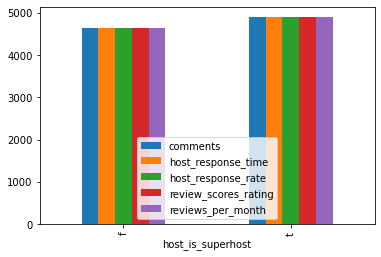

In [24]:
airbnb4.groupby(['host_is_superhost']).count().plot(kind='bar');

There are more instances of superhosts in this dataset than not superhosts, but not by much.

In [25]:
airbnb3 = pd.concat([airbnb4])
listss = []
for x in list(airbnb4['comments']):
    a = x.split()
    listss.append(len(a))
airbnb3['comments_word_count'] = listss
airbnb3.head()

,host_is_superhost,comments,host_response_time,host_response_rate,review_scores_rating,reviews_per_month,comments_word_count
0,t,Sylvia is a hostess who is gracious and helpfu...,within a few hours,100%,4.83,3.72,29813
1,f,Elizabeth was really nice and friendly. She he...,within a day,100%,4.90,1.78,12245
2,t,"Had a wonderful time at this awesome, spacious...",within a few hours,86%,4.97,0.78,6373
3,t,Amy and family were wonderful hosts! The house...,within an hour,100%,4.97,2.12,14820
4,f,"The place was nice, it was like a disco in the...",within a day,100%,4.53,0.32,2732


In [26]:
airbnb3.groupby(['host_is_superhost'])['comments_word_count'].mean()

host_is_superhost
f    1420.951867
t    3143.427056
Name: comments_word_count, dtype: float64

Superhosts tend to have more words in the comments that hosts that are not superhosts.

In [27]:
airbnb3.groupby(['host_is_superhost'])['review_scores_rating'].mean()

host_is_superhost
f    4.725651
t    4.902036
Name: review_scores_rating, dtype: float64

Superhosts on average have a 0.2 higher rating than regular hosts.

In [28]:
airbnb3.groupby(['host_is_superhost'])['reviews_per_month'].mean()

host_is_superhost
f    1.370160
t    2.313493
Name: reviews_per_month, dtype: float64

Superhosts on average have 1 more review per month than normal hosts.

In [34]:
airbnb3.groupby(['host_is_superhost','host_response_time'])['host_response_time'].count()

host_is_superhost  host_response_time
f                  a few days or more      67
                   within a day           362
                   within a few hours     588
                   within an hour        3616
t                  a few days or more       6
                   within a day           151
                   within a few hours     496
                   within an hour        4248
Name: host_response_time, dtype: int64

On average superhosts respons faster than normal hosts.

In [48]:
airbnb3.groupby(['host_is_superhost'])['host_response_rate'].mean()

host_is_superhost
f    96.420246
t    99.146909
Name: host_response_rate, dtype: float64

The response rate for superhosts is 2.7% higher than regular hosts.

In [46]:
airbnb2['host_response_rate'] = list(map(lambda x: x[:-1], airbnb2['host_response_rate'].values))
airbnb2['host_response_rate'] = [float(x) for x in airbnb2['host_response_rate'].values]

/var/folders/25/5l_h2y610pg48l0kvvcy0zk40000gn/T/ipykernel_35013/3198272363.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb2['host_response_rate'] = list(map(lambda x: x[:-1], airbnb2['host_response_rate'].values))
/var/folders/25/5l_h2y610pg48l0kvvcy0zk40000gn/T/ipykernel_35013/3198272363.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb2['host_response_rate'] = [float(x) for x in airbnb2['host_response_rate'].values]


In [47]:
airbnb3['host_response_rate'] = list(map(lambda x: x[:-1], airbnb3['host_response_rate'].values))
airbnb3['host_response_rate'] = [float(x) for x in airbnb3['host_response_rate'].values]

In [49]:
airbnb2.head()

,host_is_superhost,comments,host_response_time,host_response_rate,review_scores_rating,reviews_per_month
0,0,Sylvia is a hostess who is gracious and helpfu...,within a few hours,100.0,4.83,3.72
1,1,Elizabeth was really nice and friendly. She he...,within a day,100.0,4.90,1.78
2,0,"Had a wonderful time at this awesome, spacious...",within a few hours,86.0,4.97,0.78
3,0,Amy and family were wonderful hosts! The house...,within an hour,100.0,4.97,2.12
4,1,"The place was nice, it was like a disco in the...",within a day,100.0,4.53,0.32


In [50]:
airbnb2.to_csv('Data/Modelling_Dataframe.csv',index=False)

In [53]:
X = airbnb2['comments']
y = airbnb2['host_is_superhost']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,stratify=y,random_state=420)

In [55]:
cvec = CountVectorizer()
cvec.fit(X_train)
X_train=cvec.transform(X_train)
X_train.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [56]:
X_test = cvec.transform(X_test)

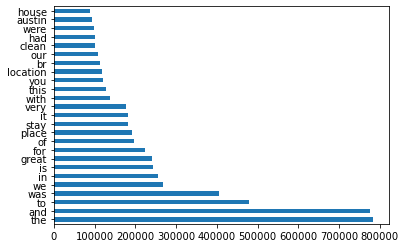

In [57]:
X_train_df = pd.DataFrame(X_train.todense(), columns=cvec.get_feature_names())
X_train_df.sum().sort_values(ascending=False).head(25).plot(kind = 'barh');

These are the words that occur the most comments. I will look to add many of these words as stop_words because they are so prevalent in comments.

In [58]:
print(CountVectorizer(stop_words = 'english').get_stop_words())
k = list(CountVectorizer(stop_words = 'english').get_stop_words())

frozenset({'ltd', 'neither', 'yourselves', 'ourselves', 'mine', 'almost', 'moreover', 'at', 'be', 'mill', 'move', 'still', 'de', 'otherwise', 'get', 'during', 'thus', 'none', 'toward', 'two', 'has', 'less', 'nothing', 'is', 'latterly', 'most', 'where', 'else', 'six', 'twelve', 'her', 'down', 'and', 'enough', 'will', 'eleven', 'hers', 'off', 'formerly', 'both', 'inc', 'much', 'however', 'when', 'herein', 'everything', 'everywhere', 'throughout', 'seeming', 'here', 'wherein', 'whom', 'though', 'yet', 'were', 'whereafter', 'side', 'becoming', 'found', 'am', 'while', 'she', 'across', 'we', 'only', 'around', 'how', 'seemed', 'whose', 'any', 'yours', 'sixty', 'serious', 'same', 'thereafter', 'you', 'nowhere', 'through', 'more', 'own', 'meanwhile', 'twenty', 'noone', 'often', 'top', 'than', 'no', 'do', 'afterwards', 'since', 'via', 'elsewhere', 'hereafter', 'can', 'amoungst', 'itself', 'whoever', 'that', 'anywhere', 'per', 'well', 'until', 'wherever', 'every', 'even', 'anyhow', 'would', 're',

These are sklearn's stopwords, This will be the list of words I choose from when creating parameters.

In [61]:
def histogram(column):
    plt.figure(figsize=(12,6))
    ax = plt.hist(x = airbnb2[column]);
    plt.ylabel("# of Instances")
    plt.xlabel(column)
    plt.show();

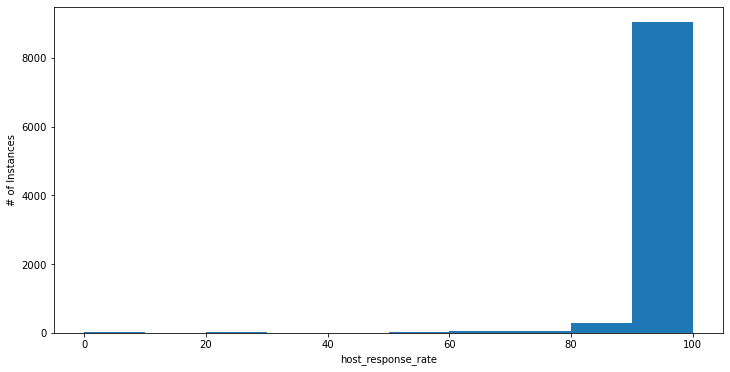

In [62]:
histogram('host_response_rate')

Skewed left with most response rate being between 80% and 100%.

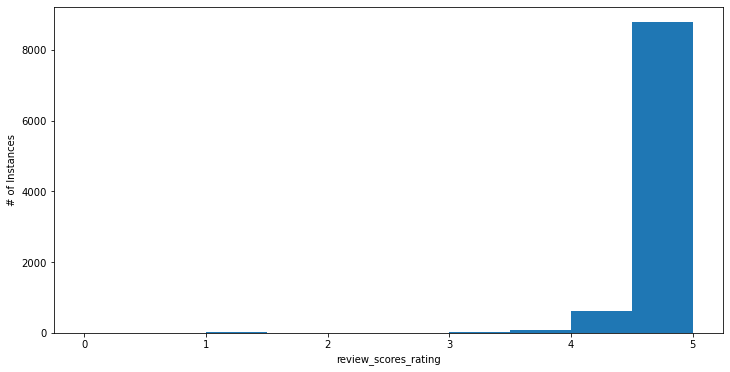

In [63]:
histogram('review_scores_rating')

Skewed left with most review scores being between 4 and 5.

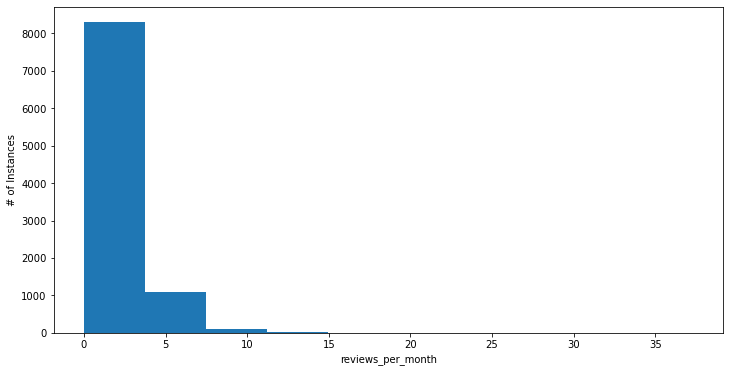

In [64]:
histogram('reviews_per_month')

Skewed right with # of reviews per month being between 0 and 7.